In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [1]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, GridSearchCV, KFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB

### Область работы 2 (поиск лучшей модели)

In [4]:
path_train = 'dim_train.csv'
df = pd.read_csv(path_train)

In [12]:
df.sum(axis=1)

/var/folders/zh/c643kl5d2_95tptv5d9y96qw0000gn/T/ipykernel_1932/1459321664.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


0         1122.67
1         3210.56
2         4352.31
3         7022.81
4          675.18
           ...   
40450    17896.99
40451     2966.56
40452      618.11
40453     3317.75
40454    11716.29
Length: 40455, dtype: float64

In [3]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3673 non-null   float64
 1   volatile acidity      3673 non-null   float64
 2   citric acid           3673 non-null   float64
 3   residual sugar        3673 non-null   float64
 4   chlorides             3673 non-null   float64
 5   free sulfur dioxide   3673 non-null   float64
 6   total sulfur dioxide  3673 non-null   float64
 7   density               3673 non-null   float64
 8   pH                    3673 non-null   float64
 9   sulphates             3673 non-null   float64
 10  alcohol               3673 non-null   float64
 11  quality               3673 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 344.5 KB


In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,6.846665,0.278138,0.334568,6.428233,0.045736,35.081269,138.022189,0.994023,3.187414,0.488647,10.516330,5.878029
std,0.831783,0.101203,0.119855,5.134907,0.021699,16.582853,42.179044,0.003027,0.150749,0.112795,1.230426,0.885823
min,3.900000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.250000,0.043000,33.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,45.000000,166.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.230000,65.800000,0.346000,146.500000,366.500000,1.038980,3.800000,1.080000,14.200000,9.000000


In [6]:
wine_df.loc[(wine_df.quality < 7), 'quality'] = 0
wine_df.loc[(wine_df.quality >= 7), 'quality'] = 1
wine_df = wine_df.rename(columns={'quality': 'is_good'})

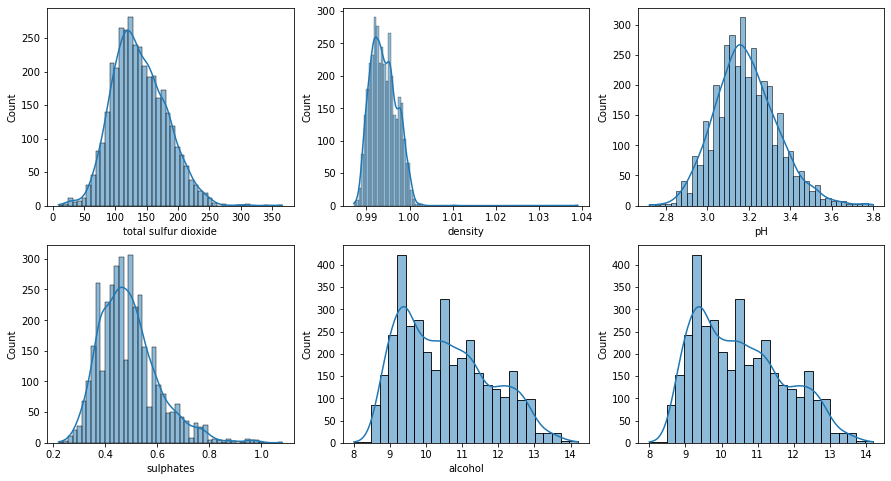

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
sns.histplot(data=wine_df, x="total sulfur dioxide", kde=True, ax=axs[0, 0])
sns.histplot(data=wine_df, x="density", kde=True,ax=axs[0, 1])
sns.histplot(data=wine_df, x="pH", kde=True,  ax=axs[0, 2])
sns.histplot(data=wine_df, x="sulphates", kde=True,  ax=axs[1, 0])
sns.histplot(data=wine_df, x="alcohol", kde=True, ax=axs[1, 1])
sns.histplot(data=wine_df, x="alcohol", kde=True, ax=axs[1, 2])
plt.xlabel('')


plt.show()

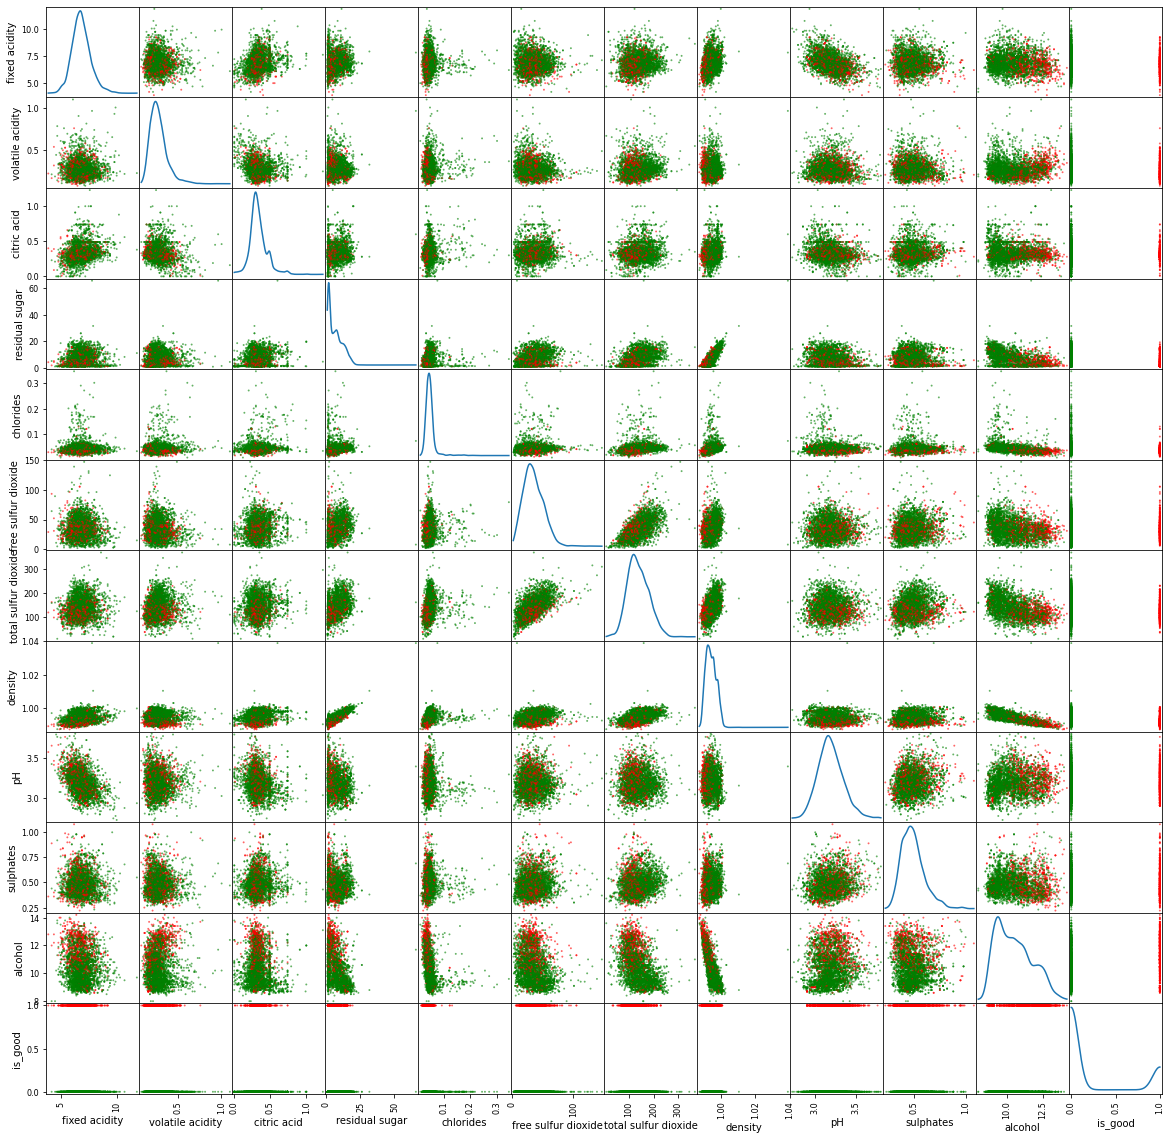

In [8]:
pd_plt.scatter_matrix(wine_df,
                     c=pd.factorize(wine_df['is_good'])[0],
                     alpha = 0.6,
                     s=15,
                     figsize=(20,20),
                     diagonal='kde',
                     cmap = plt_colors.ListedColormap(['red','green']))
plt.show()

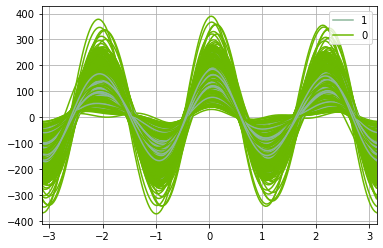

In [9]:
pd_plt.andrews_curves(wine_df, 'is_good')
plt.show()

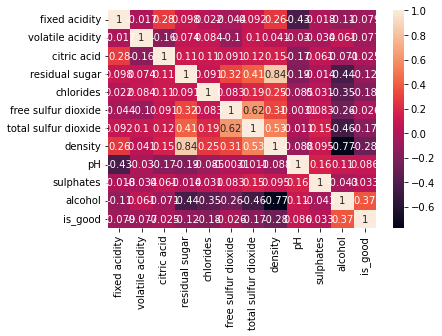

In [10]:
sns.heatmap(wine_df.corr(), annot=True)
plt.show()

In [11]:
X = wine_df.drop(columns = 'is_good')
y = wine_df['is_good']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
knk = KNeighborsClassifier()
param_grid = [{
    'n_neighbors': (range(1,30,2)),
    'weights' : ['uniform','distance'],
    'p': [1,2,3]
}]
cv = KFold()

grid = GridSearchCV(knk, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(1, 30, 2), 'p': [1, 2, 3],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True)

In [1]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

NameError: name 'pd' is not defined

In [45]:
pipe_1 = make_pipeline(Normalizer(),   KNeighborsClassifier(n_neighbors = 17, p=1,weights = 'distance', ))
pipe_2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 21, p=1, weights = 'distance'))
pipe_3 = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors= 29, p = 3, weights = 'distance'))

pipe_1.fit(X_train,y_train)
pipe_2.fit(X_train,y_train)
pipe_3.fit(X_train,y_train)

y_pred_1 = pipe_1.predict(X_test)
y_pred_2 = pipe_2.predict(X_test)
y_pred_3 = pipe_3.predict(X_test)

print(classification_report(y_test, y_pred_1))
print(classification_report(y_test, y_pred_2))
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       863
           1       0.71      0.42      0.53       239

    accuracy                           0.84      1102
   macro avg       0.78      0.69      0.71      1102
weighted avg       0.82      0.84      0.82      1102

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       863
           1       0.75      0.56      0.65       239

    accuracy                           0.87      1102
   macro avg       0.82      0.76      0.78      1102
weighted avg       0.86      0.87      0.86      1102

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       863
           1       0.82      0.53      0.64       239

    accuracy                           0.87      1102
   macro avg       0.85      0.75      0.78      1102
weighted avg       0.87      0.87      0.86      1102



In [24]:
print(roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

0.8364079764565566


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/revopart/opt/anaconda3/lib/p

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['none'],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMax

In [26]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,4,12,16,20,8,31,18,2,6,...,28,29,30,27,3,7,11,15,19,23
mean_fit_time,0.027347,0.017237,0.011554,0.024634,0.063408,0.006546,0.16376,0.051435,0.019343,0.018646,...,0.035578,0.017502,0.022019,0.104809,0.012905,0.01853,0.006745,0.013968,0.016227,0.026132
std_fit_time,0.011028,0.002176,0.000738,0.005857,0.024448,0.000449,0.097138,0.020011,0.001521,0.001332,...,0.012595,0.001908,0.000714,0.027962,0.000421,0.001971,0.000482,0.002047,0.007051,0.006123
mean_score_time,0.002199,0.001674,0.002408,0.006124,0.004831,0.00181,0.002148,0.003381,0.001751,0.002317,...,0.001787,0.001756,0.001932,0.004891,0.001726,0.002181,0.005049,0.006568,0.006772,0.002013
std_score_time,0.000582,0.000032,0.000525,0.004751,0.001808,0.000111,0.000548,0.002687,0.00008,0.000494,...,0.000072,0.00003,0.000376,0.00247,0.000027,0.000437,0.006176,0.004179,0.008589,0.000074
param_clf__penalty,l2,l2,l2,l2,l1,l2,none,l2,l2,l2,...,none,none,none,none,l2,l2,l2,l2,l2,l1
param_clf__solver,newton-cg,lbfgs,sag,saga,liblinear,liblinear,newton-cg,saga,newton-cg,lbfgs,...,newton-cg,newton-cg,newton-cg,lbfgs,newton-cg,lbfgs,liblinear,sag,saga,liblinear
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),RobustScaler(),RobustScaler(),RobustScaler(),...,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...",...,"{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline..."
split0_test_score,0.799223,0.799223,0.799223,0.799223,0.800518,0.796632,0.797927,0.795337,0.795337,0.795337,...,0.794041,0.794041,0.794041,0.791451,0.783679,0.783679,0.783679,0.783679,0.783679,0.779793
split1_test_score,0.792746,0.792746,0.792746,0.792746,0.796632,0.796632,0.801813,0.792746,0.792746,0.792746,...,0.786269,0.786269,0.786269,0.791451,0.783679,0.783679,0.783679,0.783679,0.783679,0.779793


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])


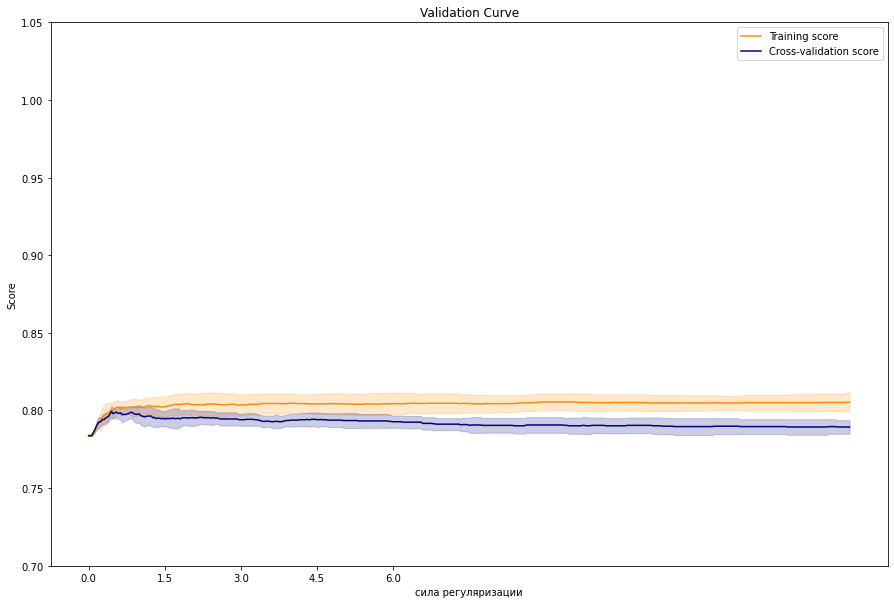

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe_1 = make_pipeline(MinMaxScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2'))
print(pipe_1)
n_range = np.linspace(0.0001, 15, 500)
train_scores, test_scores = validation_curve(
    pipe_1, X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = cv, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.7, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 5))
plt.legend(loc="best")
plt.show()

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])


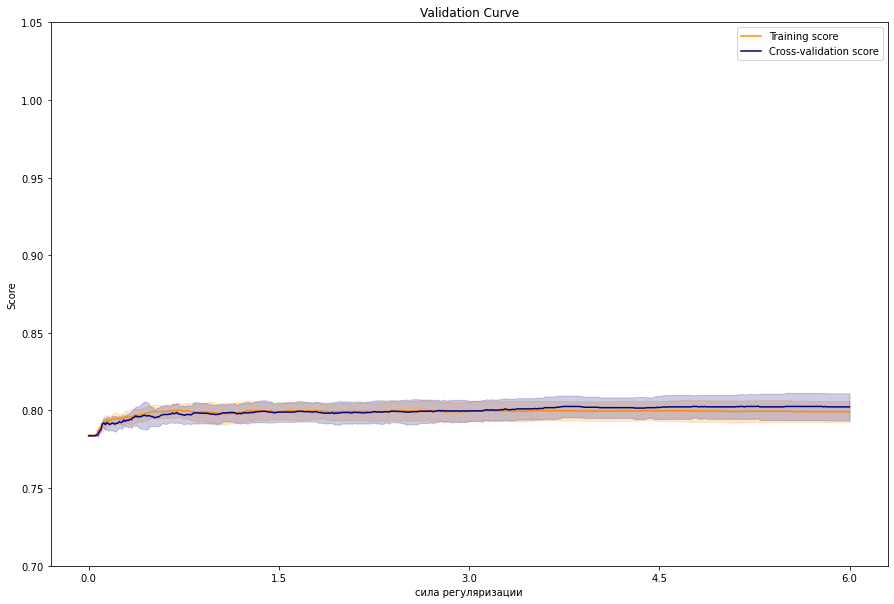

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe_1 = make_pipeline(MinMaxScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l1'))
print(pipe_1)
n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    pipe_1, X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = cv, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.7, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 5))
plt.legend(loc="best")
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
pipe_end = make_pipeline( StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 1))
pipe_end.fit(X_train,y_train)
y_pred_end = pipe_end.predict(X_test)
pipe_end.score(X_test, y_test)
print(roc_auc_score(y_test, pipe_end.predict_proba(X_test)[:,1]))

0.7744367463892134


In [32]:
print(classification_report(y_test, y_pred_end))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       863
           1       0.53      0.28      0.36       239

    accuracy                           0.79      1102
   macro avg       0.68      0.60      0.62      1102
weighted avg       0.76      0.79      0.76      1102



In [33]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [34]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.005278,0.005546,0.007188,0.004415
std_fit_time,0.000383,0.001998,0.000613,0.000494
mean_score_time,0.002574,0.002229,0.002296,0.002105
std_score_time,0.000579,0.000354,0.000571,0.000236
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.716321,0.716321,0.716321,0.681347
split1_test_score,0.717617,0.717617,0.717617,0.67487
split2_test_score,0.700777,0.700777,0.700777,0.73057


In [35]:
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       863
           1       0.42      0.73      0.53       239

    accuracy                           0.72      1102
   macro avg       0.66      0.72      0.66      1102
weighted avg       0.80      0.72      0.74      1102



### Область работы 3 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 3 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [2]:
# Путь к тренировочному набору
path_train = 'wine_train.csv'
# Путь к тестовому набору
path_test  = 'wine_test.csv'# содержит только имя файла, без имен папок

In [3]:
# Блок(и) обучения и поверки модели

In [5]:
wine_df = pd.read_csv(path_train)
wine_df.loc[(train_df.quality < 7), 'quality'] = 0
wine_df.loc[(train_df.quality >= 7), 'quality'] = 1
wine_df = wine_df.rename(columns={'quality': 'is_good'})
X_train = wine_df.drop(columns = 'is_good')
y_train = wine_df['is_good']
X_test = pd.read_csv(path_test)
pipe = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors= 29, p = 3, weights = 'distance'))
pipe.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=29, p=3,
                                      weights='distance'))])

In [6]:
# Блок предсказания с использованием тестового набора

In [7]:
y_new = pipe.predict(X_test)

In [8]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = y_new